# Mission 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import PercentFormatter
import numpy as np
from IPython.display import clear_output
from statistics import stdev
from scipy.stats import ttest_ind
import scipy
import scipy.stats as sc
import scipy.stats.distributions as distributions


musicFrom2010_2019 = pd.read_csv('dataset-of-10s.csv')

In [3]:
musicFrom2010_2019.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


## Part 1 - Estimation

In [4]:
X = musicFrom2010_2019['key']
Y = musicFrom2010_2019['mode']

### Part 1A

In [5]:
X_minor = musicFrom2010_2019[musicFrom2010_2019['mode'] == 0]['key']
X_major = musicFrom2010_2019[musicFrom2010_2019['mode'] == 1]['key']

In [6]:
major_mean = X_major.mean()
major_se = X_major.sem()
n_major = len(X_major)

In [7]:
print('Mean of X_major: ', major_mean, '\nNumber of samples X_major: ', n_major)

Mean of X_major:  4.893220338983051 
Number of samples X_major:  4130


In [111]:
minor_mean = X_minor.mean()
minor_se = X_minor.sem()
n_minor = len(X_minor)

In [112]:
print('Mean of X_minor: ', minor_mean, '\nNumber of samples X_minor: ', n_minor)

Mean of X_minor:  5.994268077601411 
Number of samples X_minor:  2268


### Part 1B

For the major category, since n = 4130, we can assume using the Central Limit Theorem that Major Mean is normally distributed
with an unknown expectation mu major and known standard error.

In [113]:
print('Standard error of X_major: ', major_se)

Standard error of X_major:  0.05555550488751005


With probability of about 95% the following interval will contain mu major:

In [11]:
confidence_interval_major = [major_mean - 2 * major_se, major_mean + 2 * major_se]
print(confidence_interval_major, 'contains mu of X_major with about 95% confidence')

[4.782109329208031, 5.004331348758071] contains mu of X_major with about 95% confidence


For the minor category, since n = 2268, we can assume using the Central Limit Theorem that Minor Mean is normally distributed
with an unknown expectation mu minor and known standard error.

In [115]:
print('Standard error of X_minor: ', minor_se)

Standard error of X_minor:  0.07482302627586153


With probability of about 95% the following interval will contain mu minor:

In [116]:
confidence_interval_minor = [minor_mean - 2 * minor_se, minor_mean + 2 * minor_se]
print(confidence_interval_minor, 'contains mu of X_minor with about 95% confidence')

[5.844622025049688, 6.143914130153133] contains mu of X_minor with about 95% confidence


### Part 1C

We can see that the confidence interval of each category does not overlap:

In [117]:
print('Right limit of major mu CI: {} < Left limit of minor mu CI: {}'.format(confidence_interval_major[1], confidence_interval_minor[0]))

Right limit of major mu CI: 5.004331348758071 < Left limit of minor mu CI: 5.844622025049688


## Part 2 - Hypothesis

### Part 2A

Our null hypothesis and alternative hypothesis are:

$$ H_0: \mu_{major} - \mu_{minor} = 0 $$
$$ H_1: \mu_{major} - \mu_{minor} \neq 0 $$

### Part 2B

In [118]:
def makeGraph(mode):
    fig = plt.figure(figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(221)
    values = musicFrom2010_2019[musicFrom2010_2019['mode'] == mode]['key']
    values.plot.kde(ax=ax, legend=False, title='major' if mode==1 else 'minor')
    values.plot.hist(density=True, ax=ax)
    ax.set_xlim([values.min() - 0.1, values.max() + 0.1])
    ax.grid(axis='both')
    ax.set_facecolor('#d8dcd6')
    clear_output(wait=False)
    return fig

#### Minor distribution

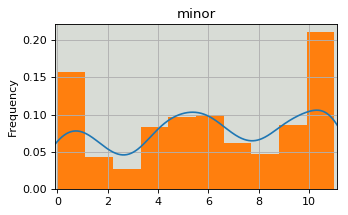

In [119]:
fig = makeGraph(0)
plt.show()

#### Major distribution

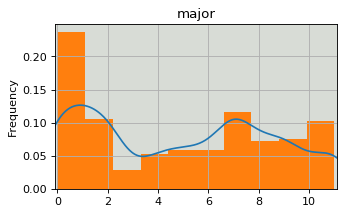

In [120]:
fig = makeGraph(1)
plt.show()

We see that our two populations does not look like a normal distribution, and so we can't use t-test under the assumption that our data is normally distributed.
However, due to the Central Limit Theorem we say our means are normally distributed and use them in the test.

### Part 2C

We define our T test as follows:

$$ H_0: \mu_{major} - \mu_{minor} = 0 $$
$$ H_1: \mu_{major} - \mu_{minor} \neq 0 $$
$$ T.S: T= \frac{(\bar{X}_{major} - {\bar{X}_{minor}})-0}{S_p \sqrt{\frac{1}{n_{major}}+\frac{1}{n_{minor}}}} $$
$$ R.R: T < -t_{1-\alpha/2} $$
$$ T > t_{1-\alpha/2} $$

In [121]:
Sp2 = ((n_major - 1) * X_major.var() + (n_minor - 1) * X_minor.var()) / (n_major + n_minor - 2)
Sp = np.sqrt(Sp2)
T = (major_mean - minor_mean - 0) / (Sp * np.sqrt(1/n_major + 1/n_minor))
print('Our test statistic T equals: ', T)

Our test statistic T equals:  -11.80803686438186


In [122]:
ttest, pval = ttest_ind(X_minor, X_major)
print('We check that our T calculations: {} fits the ones from scipy: {}'.format(abs(T), ttest))
print("We find that the p-value is: {} \n".format(pval))

if pval < 0.05:
  print("Thus, we reject the null hypothesis.")
else:
  print("Thus, we accept the null hypothesis.")

We check that our T calculations: 11.80803686438186 fits the ones from scipy: 11.808036864381833
We find that the p-value is: 7.58362525494075e-32 

Thus, we reject the null hypothesis.


We see that our P-value is less than 0.05 and thus we conclude that with high probability $$ \mu_{major} - \mu_{minor} \neq 0 $$
We saw on the first part that the expectation confidence intervals did not overlap and so we expected the alternative hypothesis to be true, according to the t-test our expectations were correct.

#### Part 2D

We define our Wald test as follows:

$$ H_0: \mu_{major} - \mu_{minor} = 0 $$
$$ H_1: \mu_{major} - \mu_{minor} \neq 0 $$
$$ T.S: W = \frac{(\bar{X}_{major} - {\bar{X}_{minor}})-0}{\sqrt{\frac{S_{major}^2}{n_{major}}+\frac{S_{minor}^2}{n_{minor}}}} $$
$$ R.R: |W| > z_{\alpha/2} $$

In [123]:
z_alpha_2 = sc.norm.ppf(.025)
print('We will reject the null hypothesis if |W| > {}'.format(abs(z_alpha_2)))

We will reject the null hypothesis if |W| > 1.9599639845400545


In [124]:
major_std_pow2 = np.power(np.std(X_major), 2)
minor_std_pow2 = np.power(np.std(X_minor), 2)

denominator = np.sqrt(((major_std_pow2 / len(X_major)) + (minor_std_pow2 / len(X_minor))))

In [125]:
W = (major_mean - minor_mean - 0) / denominator

In [126]:
print('Our test statistics for the Wald test is: {}'.format(W))

Our test statistics for the Wald test is: -11.816916648171947


Thus, with the Wald test we also reject the null hypothesis and conclude that the expectations of the major and minor categories are different.

In [127]:
# pvalue of Wald Test
pvalueWald = 2*scipy.stats.norm.cdf(-abs(W))
print('P-value for our Wald test is: {}'.format(pvalueWald))

# pvalue of T test
pvalueT = 2*distributions.t.sf(abs(T), (n_major + n_minor - 2))
print('P-value for our t-test is: {}'.format(pvalueT))

P-value for our Wald test is: 3.191856017873604e-32
P-value for our t-test is: 7.58362525493858e-32


#### Part 2E

We rejected the null hypothesis in both tests, meaning that we can conclude that the expectation for the major and minor categories are different.

In [128]:
print('Our test statistic which we denoted as T for t-test is: {} and W for wald test is: {}'.format(abs(T),abs(W)))

Our test statistic which we denoted as T for t-test is: 11.80803686438186 and W for wald test is: 11.816916648171947


We see that the P-value for both tests is extremely small, however a bit different where the P-value for the the Wald test is smaller.

In [129]:
pvalueWald = 2*scipy.stats.norm.cdf(-abs(W))
print('P-value for our Wald test is: {}\nP-value for our t-test is: {}'.format(pvalueWald, pvalueT))

P-value for our Wald test is: 3.191856017873604e-32
P-value for our t-test is: 7.58362525493858e-32


This kind of values for our P-values shows that we reject our null hypothesis with probability that is very close to 1.
The probability of considering the null hypothesis is almost non existent, 0.

## Part 3 - Different Sample Sizes

#### Part 3A

Lets create random samples of 30, 50, 100 and 500:

In [130]:
sample30 = musicFrom2010_2019.sample(30)
sample30_X_minor = sample30[sample30['mode'] == 0]['key']
sample30_X_major = sample30[sample30['mode'] == 1]['key']

sample50 = musicFrom2010_2019.sample(50)
sample50_X_minor = sample50[sample50['mode'] == 0]['key']
sample50_X_major = sample50[sample50['mode'] == 1]['key']

sample100 = musicFrom2010_2019.sample(100)
sample100_X_minor = sample100[sample100['mode'] == 0]['key']
sample100_X_major = sample100[sample100['mode'] == 1]['key']

sample500 = musicFrom2010_2019.sample(500)
sample500_X_minor = sample500[sample500['mode'] == 0]['key']
sample500_X_major = sample500[sample500['mode'] == 1]['key']

#### Part 3B

Now we'll calculate confidene interval for each sample

In [131]:
def calculate_confidence_interval(sample_X_minor, sample_X_major, print_result=True):
    sample_major_mean = sample_X_major.mean()
    sample_major_se = sample_X_major.sem()
    sample_n_major = len(sample_X_major)
    sample_confidence_interval_major = [sample_major_mean - 2 * sample_major_se, sample_major_mean + 2 * sample_major_se]
    
    sample_minor_mean = sample_X_minor.mean()
    sample_minor_se = sample_X_minor.sem()
    sample_n_minor = len(sample_X_minor)
    sample_confidence_interval_minor = [sample_minor_mean - 2 * sample_minor_se, sample_minor_mean + 2 * sample_minor_se]
    
    if print_result:
        print('Mean of X_major: ', sample_major_mean, '\nNumber of samples X_major: ', sample_n_major)
        print('Standard error of X_major: ', sample_major_se)
        print(sample_confidence_interval_major, 'contains mu of X_major with about 95% confidence')
        print('All data major confidence interval:',confidence_interval_major)
        print()
        print('Mean of X_minor: ', sample_minor_mean, '\nNumber of samples X_minor: ', sample_n_minor)
        print('Standard error of X_minor: ', sample_minor_se)
        print(sample_confidence_interval_minor, 'contains mu of X_minor with about 95% confidence')
        print('All data minor confidence interval:', confidence_interval_minor)
        
    return sample_confidence_interval_major, sample_confidence_interval_minor

In [132]:
print('Sample of 30')
print('-----------------------')
sample30_confidence_interval_major, sample30_confidence_interval_minor = calculate_confidence_interval(sample30_X_minor, sample30_X_major)

Sample of 30
-----------------------
Mean of X_major:  5.05 
Number of samples X_major:  20
Standard error of X_major:  0.723569368878304
[3.6028612622433918, 6.497138737756607] contains mu of X_major with about 95% confidence
All data major confidence interval: [4.782109329208031, 5.004331348758071]

Mean of X_minor:  6.0 
Number of samples X_minor:  10
Standard error of X_minor:  1.1450376024878444
[3.7099247950243113, 8.29007520497569] contains mu of X_minor with about 95% confidence
All data minor confidence interval: [5.844622025049688, 6.143914130153133]


In [133]:
print('Sample of 50')
print('-----------------------')
sample50_confidence_interval_major, sample50_confidence_interval_minor = calculate_confidence_interval(sample50_X_minor, sample50_X_major)

Sample of 50
-----------------------
Mean of X_major:  5.538461538461538 
Number of samples X_major:  26
Standard error of X_major:  0.6157691106519847
[4.306923317157569, 6.769999759765508] contains mu of X_major with about 95% confidence
All data major confidence interval: [4.782109329208031, 5.004331348758071]

Mean of X_minor:  6.125 
Number of samples X_minor:  24
Standard error of X_minor:  0.8194035034397129
[4.486192993120574, 7.763807006879426] contains mu of X_minor with about 95% confidence
All data minor confidence interval: [5.844622025049688, 6.143914130153133]


In [134]:
print('Sample of 100')
print('-----------------------')
sample100_confidence_interval_major, sample100_confidence_interval_minor = calculate_confidence_interval(sample100_X_minor, sample100_X_major)

Sample of 100
-----------------------
Mean of X_major:  4.8 
Number of samples X_major:  65
Standard error of X_major:  0.45372390791690137
[3.892552184166197, 5.7074478158338025] contains mu of X_major with about 95% confidence
All data major confidence interval: [4.782109329208031, 5.004331348758071]

Mean of X_minor:  5.6571428571428575 
Number of samples X_minor:  35
Standard error of X_minor:  0.5840209175816129
[4.489101021979632, 6.825184692306083] contains mu of X_minor with about 95% confidence
All data minor confidence interval: [5.844622025049688, 6.143914130153133]


In [135]:
print('Sample of 500')
print('-----------------------')
sample500_confidence_interval_major, sample500_confidence_interval_minor = calculate_confidence_interval(sample500_X_minor, sample500_X_major)

Sample of 500
-----------------------
Mean of X_major:  4.8522727272727275 
Number of samples X_major:  352
Standard error of X_major:  0.1897035154432166
[4.472865696386294, 5.231679758159161] contains mu of X_major with about 95% confidence
All data major confidence interval: [4.782109329208031, 5.004331348758071]

Mean of X_minor:  6.1824324324324325 
Number of samples X_minor:  148
Standard error of X_minor:  0.2718714063801338
[5.6386896196721645, 6.7261752451927] contains mu of X_minor with about 95% confidence
All data minor confidence interval: [5.844622025049688, 6.143914130153133]


As you can see that all confidence intervals of the samples, contains all data confidence interval. 

#### Part 3C

Now we'll calculate Wald test for each sample

In [136]:
def wald_test(sample_X_major, sample_X_minor, print_result=True):
    sample_n_major = len(sample_X_major)
    sample_n_minor = len(sample_X_minor)
    sample_major_std_pow2 = np.power(np.std(sample_X_major), 2)
    sample_minor_std_pow2 = np.power(np.std(sample_X_minor), 2)
    sample_minor_mean = sample_X_major.mean()
    sample_major_mean = sample_X_minor.mean()

    denominator = np.sqrt(((sample_major_std_pow2 / sample_n_major) + (sample_minor_std_pow2 / sample_n_minor)))
    
    sample_W = (sample_major_mean - sample_minor_mean - 0) / denominator
    sample_pvalueWald = 2*scipy.stats.norm.cdf(-abs(sample_W))
    
    if print_result:
        print('Sample test statistic W equals: {}'.format(abs(sample_W)))
        print('All data test statistic W equals: {}'.format(abs(W)))    
        print()
        print('Sample P-value for our Wald test is: {}'.format(sample_pvalueWald))
        print('All data P-value for our Wald test is: {}'.format(pvalueWald))
        
    return sample_W, sample_pvalueWald

In [137]:
print('Sample of 30')
print('-----------------------')
sample30_wald, sample30_pvalueWald = wald_test(sample30_X_minor, sample30_X_major)

Sample of 30
-----------------------
Sample test statistic W equals: 0.7335141943100632
All data test statistic W equals: 11.816916648171947

Sample P-value for our Wald test is: 0.463244873735441
All data P-value for our Wald test is: 3.191856017873604e-32


In [138]:
print('Sample of 50')
print('-----------------------')
sample50_wald, sample50_pvalueWald = wald_test(sample50_X_minor, sample50_X_major)

Sample of 50
-----------------------
Sample test statistic W equals: 0.5841963650350763
All data test statistic W equals: 11.816916648171947

Sample P-value for our Wald test is: 0.5590882068282697
All data P-value for our Wald test is: 3.191856017873604e-32


In [139]:
print('Sample of 100')
print('-----------------------')
sample_wald100, sample_pvalue100Wald = wald_test(sample100_X_minor, sample100_X_major)

Sample of 100
-----------------------
Sample test statistic W equals: 1.1729215321516084
All data test statistic W equals: 11.816916648171947

Sample P-value for our Wald test is: 0.24082727394464043
All data P-value for our Wald test is: 3.191856017873604e-32


In [140]:
print('Sample of 500')
print('-----------------------')
sample500_wald, sample_pvalue500Wald = wald_test(sample500_X_minor, sample500_X_major)

Sample of 500
-----------------------
Sample test statistic W equals: 4.023407731893003
All data test statistic W equals: 11.816916648171947

Sample P-value for our Wald test is: 5.7362062938460166e-05
All data P-value for our Wald test is: 3.191856017873604e-32



From our results we can see that we cannot reject the null hypothesis for the sets of 30, 50, 100 samples from the dataset since our test statistic is smaller than $ W < z_{\alpha/2} = 1.96 $.
We see that the set of 500 samples has a test statistic  $ W > z_{\alpha/2} $ and so for 500 samples we can reject the null hypothesis with a fairly small p-value.

We assume that 30-100 samples might not be enough data to get to a conclusion about our expectation. Maybe because of the fact that the confidence intervals for those sets are very large and thus overlaps with each other resulting in a possibility that the expectations of both categories might be the same.

We would like to add that since we sample randomly, some sample sets may act differently and reject the null hypothesis for 30-100 samples. However, in this run the results are as we mentioned above.

#### Part 3D

In [141]:
def run_many_tests(sample_size, num_of_tests=100):
    confidence_interval_major_list = []
    confidence_interval_minor_list = []
    wald_list = []
    pvalueWald_list = []
    for i in range(num_of_tests):
        sample = musicFrom2010_2019.sample(sample_size)
        sample_X_minor = sample[sample['mode'] == 0]['key']
        sample_X_major = sample[sample['mode'] == 1]['key']
        
        sample_confidence_interval_major, sample_confidence_interval_minor = calculate_confidence_interval(sample_X_minor, sample_X_major, False)
        confidence_interval_major_list.append(sample_confidence_interval_major)
        confidence_interval_minor_list.append(sample_confidence_interval_minor)
        
        sample_wald, sample_pvalueWald = wald_test(sample_X_minor, sample_X_major, False)
        wald_list.append(sample_wald)
        pvalueWald_list.append(sample_pvalueWald)
    
    return confidence_interval_major_list, confidence_interval_minor_list, wald_list, pvalueWald_list

In [142]:
def show_tests_result(title, confidence_interval_major_list, confidence_interval_minor_list, wald_list, pvalueWald_list): 
    fig, axs = plt.subplots(2, 2, tight_layout=True, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
    fig.suptitle(title, fontsize=16)
    
    # Minor range
    axs[0][0].grid(color='grey', linestyle='-', linewidth=0.2)
    N, bins, patches = axs[0][0].hist(np.array(confidence_interval_minor_list), density=True)
    max_N = max(np.concatenate(N))
    axs[0][0].set_xticks(np.arange(int(bins.min()),int(bins.max()+1),1))
    l_0_low = Line2D([confidence_interval_minor[0],confidence_interval_minor[0]], [0,max_N], color='red')
    axs[0][0].add_line(l_0_low)
    l_0_high = Line2D([confidence_interval_minor[1],confidence_interval_minor[1]], [0,max_N], color='red')
    axs[0][0].add_line(l_0_high)
    axs[0][0].set_title('Minor Confidence Interval')

    # Major range
    axs[0][1].grid(color='grey', linestyle='-', linewidth=0.2)
    N, bins, patches = axs[0][1].hist(np.array(confidence_interval_major_list), density=True)
    axs[0][1].set_xticks(np.arange(int(bins.min()),int(bins.max()+1),1))
    l_1_low = Line2D([confidence_interval_major[0],confidence_interval_major[0]], [0,max_N], color='red')
    axs[0][1].add_line(l_1_low)
    l_1_high = Line2D([confidence_interval_major[1],confidence_interval_major[1]], [0,max_N], color='red')
    axs[0][1].add_line(l_1_high)
    axs[0][1].set_title('Major Confidence Interval')

    # Wald test
    axs[1][0].grid(color='grey', linestyle='-', linewidth=0.2)
    N, bins, patches = axs[1][0].hist(np.array(wald_list), density=True)
    l_3 = Line2D([W,W], [0,N.max()], color='red')
    axs[1][0].add_line(l_3)
    axs[1][0].set_title('Wald Test')

    # Wald Test P-Value
    axs[1][1].grid(color='grey', linestyle='-', linewidth=0.2)
    N, bins, patches = axs[1][1].hist(np.array(pvalueWald_list), density=True)
    l_4 = Line2D([pvalueWald,pvalueWald], [0,N.max()], color='red')
    axs[1][1].add_line(l_4)
    axs[1][1].set_title('Wald Test P-Value')

    plt.show()

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2359: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


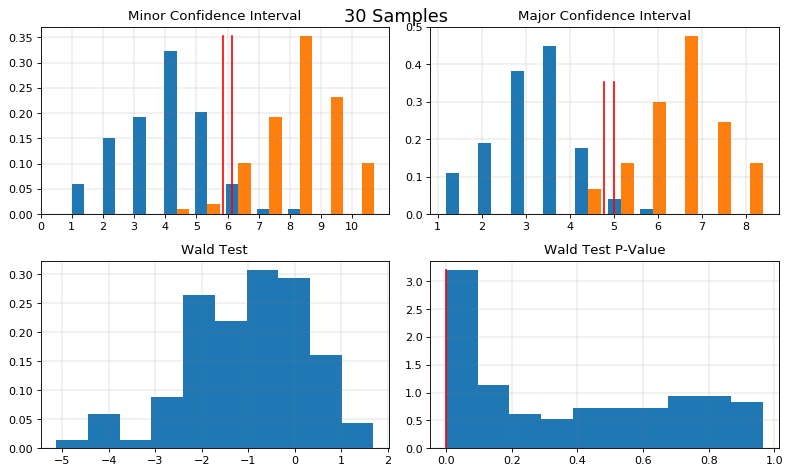

In [143]:
confidence_interval_major_list, confidence_interval_minor_list, wald_list, pvalueWald_list = run_many_tests(30)
show_tests_result('30 Samples', confidence_interval_major_list, confidence_interval_minor_list, wald_list, pvalueWald_list)

Above, you can see histograms of the requested data.<br/>
In all plots the red lines represent the all-data value.<br/>
In confidence range the blue color represent the lower value of the range and the orange color represent the upper value of the range.

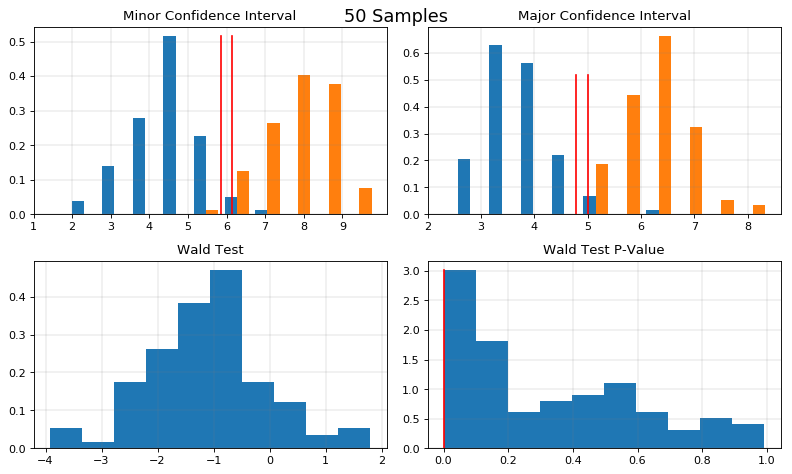

In [144]:
confidence_interval_major_list, confidence_interval_minor_list, wald_list, pvalueWald_list = run_many_tests(50)
show_tests_result('50 Samples', confidence_interval_major_list, confidence_interval_minor_list, wald_list, pvalueWald_list)

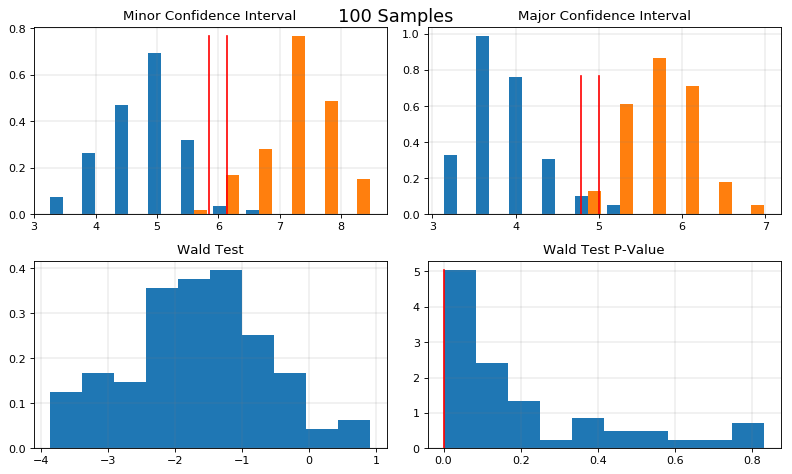

In [145]:
confidence_interval_major_list, confidence_interval_minor_list, wald_list, pvalueWald_list = run_many_tests(100)
show_tests_result('100 Samples', confidence_interval_major_list, confidence_interval_minor_list, wald_list, pvalueWald_list)

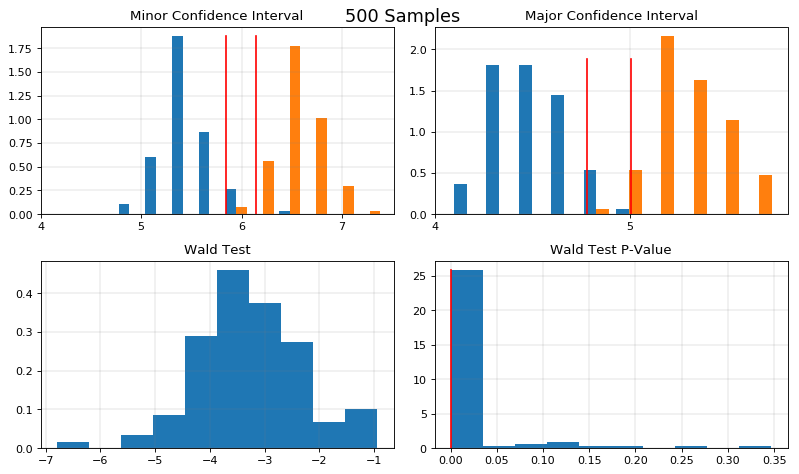

In [146]:
confidence_interval_major_list, confidence_interval_minor_list, wald_list, pvalueWald_list = run_many_tests(500)
show_tests_result('500 Samples',confidence_interval_major_list, confidence_interval_minor_list, wald_list, pvalueWald_list)

In [147]:
def calculate_mean_percentage(interval_list, mean):
    interval_list_len = len(interval_list)
    mean_appearences = 0
    for interval in interval_list:
        if mean >= interval[0] and mean <=interval[1]:
            mean_appearences += 1
    return (mean_appearences / interval_list_len) * 100

As you can see the ranges of the confidence interval of the samples are reduced as the sampling increases.<br/>
In addition, the Wald test results does not provide a result that rejects the null-hypotesis. The P-value is much more higher above all-data P-value.<br/>
So we are assuming that the sample size is too small.




In [148]:
sample_sets = [30, 50, 100, 500]
for sample_set in sample_sets:
    confidence_interval_major_list, confidence_interval_minor_list, wald_list, pvalueWald_list = run_many_tests(sample_set)
    major_mean_percentage = calculate_mean_percentage(confidence_interval_major_list, major_mean)
    minor_mean_percentage = calculate_mean_percentage(confidence_interval_minor_list, minor_mean)
    
    print('The mean of X major: {} appeared in {}% of the 100 confidence intervals of {} samples.'.format(major_mean, major_mean_percentage, sample_set))
    print('The mean of X minor: {} appeared in {}% of the 100 confidence intervals of {} samples.'.format(minor_mean, minor_mean_percentage, sample_set))
    print('-----------------------')

The mean of X major: 4.893220338983051 appeared in 94.0% of the 100 confidence intervals of 30 samples.
The mean of X minor: 5.994268077601411 appeared in 90.0% of the 100 confidence intervals of 30 samples.
-----------------------
The mean of X major: 4.893220338983051 appeared in 93.0% of the 100 confidence intervals of 50 samples.
The mean of X minor: 5.994268077601411 appeared in 90.0% of the 100 confidence intervals of 50 samples.
-----------------------
The mean of X major: 4.893220338983051 appeared in 94.0% of the 100 confidence intervals of 100 samples.
The mean of X minor: 5.994268077601411 appeared in 93.0% of the 100 confidence intervals of 100 samples.
-----------------------
The mean of X major: 4.893220338983051 appeared in 98.0% of the 100 confidence intervals of 500 samples.
The mean of X minor: 5.994268077601411 appeared in 98.0% of the 100 confidence intervals of 500 samples.
-----------------------


We see that our real expectations for the minor and major categories appear in most confidence intervals and we can't see a big difference for the major category between the different samples.

For the minor category we see that for 30 and 50 samples the expectation appeared slightly less than on bigger sample sets.